In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as npr
import time

In [11]:
from MetropolisHastings import MetropolisHastings
from ConsensusMH import ConsensusMH
from FlyMH import FlyMH
from csMALA import csMALA

In [12]:
npr.seed(1)
N = 100000
dataType = "Gaussian"
#dataType = "logNormal"
if dataType == "Gaussian":
    x = npr.randn(N)
elif dataType == "logNormal":
    x = npr.lognormal(0,1, N)

# We store the mean and std deviation for later reference, they are also the MAP and MLE estimates in this case.
realMean = np.mean(x)
realStd = np.std(x)
print(f"Mean of x = {realMean}")
print(f"Std of x = {realStd}")
MAP = np.array([realMean,realStd])
print(x)

Mean of x = 0.005253028489682668
Std of x = 0.9983292735417362
[ 1.62434536 -0.61175641 -0.52817175 ...  0.08122531  0.34404618
 -0.74755625]


In [13]:
def plt_samples(Samples):
    sns.jointplot(x=Samples[:,0],y=Samples[:,1])

## VanillaMH

Execution time: 3.143616 seconds
[[0.00525303 0.99832927]
 [0.00525303 0.99832927]
 [0.00539033 0.99763202]
 ...
 [0.00298241 1.0002222 ]
 [0.00386007 0.99903342]
 [0.00481784 0.99847682]]


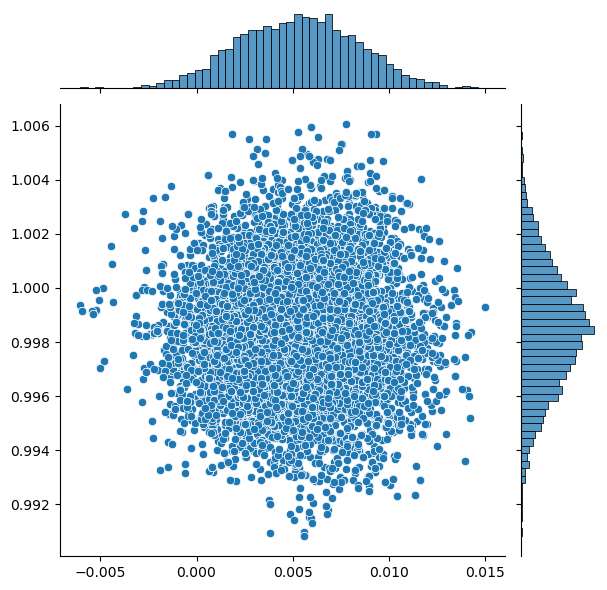

In [14]:
T = 10000
test_vanillMH = MetropolisHastings(x)

start_time = time.time()
test_vanillMH_run = test_vanillMH.run(T, MAP, x)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")
print(test_vanillMH_run)
plt_samples(test_vanillMH_run)

## ConsensusMH

Execution time: 5.090382 seconds


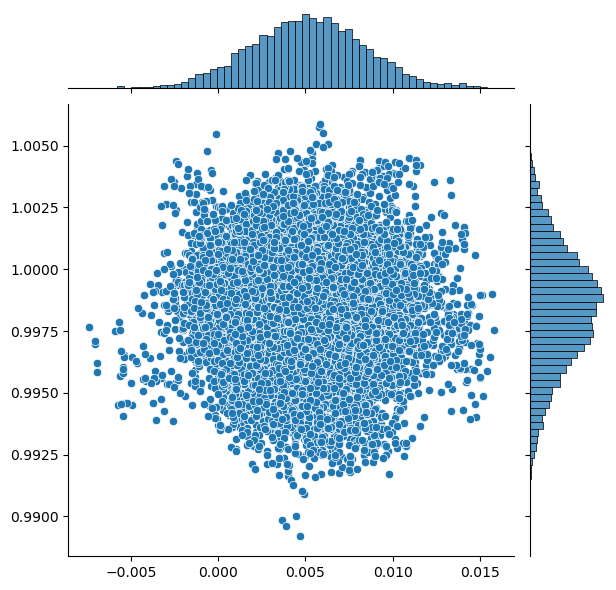

In [6]:
num_batches = 4
T = 10000

test_consMH = ConsensusMH(dataset = x, num_batches=num_batches)

start_time = time.time()
test_consMH_run = test_consMH.run(T, MAP)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")
plt_samples(test_consMH_run)

## FlyMH


c:\Users\fynno\Desktop\bt_MCMC_big_data\FlyMH.py:33: RuntimeWarning: invalid value encountered in log
  log_lkhd_new = np.log(self.get_lkhd(theta_new, data)/ self.bounding_function(theta_new) -1)
c:\Users\fynno\Desktop\bt_MCMC_big_data\FlyMH.py:34: RuntimeWarning: invalid value encountered in log
  log_lkhd_old = np.log(self.get_lkhd(theta, data) / self.bounding_function(theta) - 1)


Execution time: 5.237006 seconds


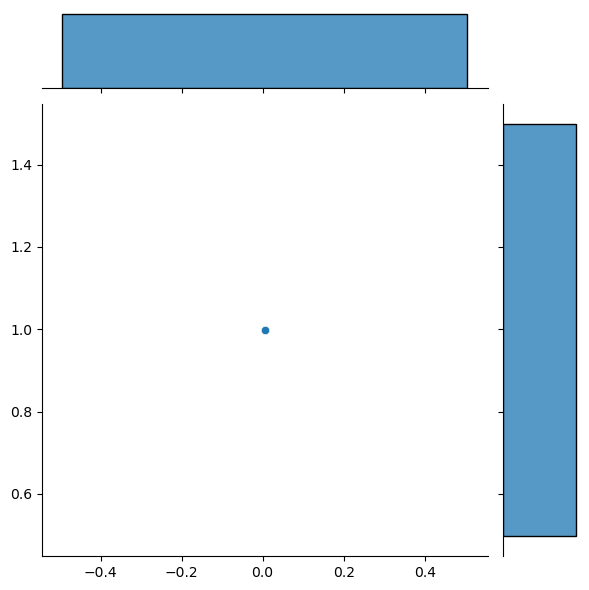

In [7]:
batch_percentage = 0.9
T = 1000

test_FlyMH = FlyMH(dataset = x, sample_fraction=batch_percentage)

start_time = time.time()
test_FlyMH_run = test_FlyMH.run(T, MAP)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")
plt_samples(test_FlyMH_run)

## csMALA

alpha: 1.0041181796862026
alpha: 1.026172694310633
alpha: 0.986602483069547
alpha: 1.0222834315412557
alpha: 1.04209590418722
alpha: 1.0656356399071323
alpha: 0.9921993054307594
alpha: 1.0052813444227449
alpha: 0.9266710453291588
alpha: 1.0141339033732273
alpha: 0.9480100928408495
alpha: 1.0462923437409994
alpha: 1.0912544565170084
alpha: 1.012378613145492
alpha: 1.3212102785059703
alpha: 0.8713839496497296
alpha: 1.5663508280527063
alpha: 1.1677030781851374
alpha: 1.2200738878349235
alpha: 0.5533946646101235
alpha: 1.6999658455784936
alpha: 1.7656078897830776
alpha: 0.6216785945713433
alpha: 0.4507850068540878
alpha: 0.5562940724483395
alpha: 0.725663944610394
alpha: 1.2187300480164438
alpha: 1.6183029488946132
alpha: 1.099320095024925
alpha: 0.7616243053607445
alpha: 0.8229645336245406
alpha: 0.8262067895645854
alpha: 0.9046455166372072
alpha: 1.0342620094768773
alpha: 0.9510345317895937
alpha: 1.0082323354148972
alpha: 0.9923146063463797
alpha: 1.103187981533131
alpha: 1.11427068075

c:\Users\fynno\Desktop\bt_MCMC_big_data\csMALA.py:84: RuntimeWarning: overflow encountered in exp
  alpha = np.exp(r_diff + (new_diff - old_diff)/(2*self.std**2))


alpha: inf
alpha: inf
alpha: 2.5514918088057787e+118
alpha: inf
alpha: 0.0
alpha: inf
alpha: 3.475679675989552e-61
alpha: 0.0
alpha: inf
alpha: inf
alpha: 0.0
alpha: 2.9847835695740605e-263
alpha: inf
alpha: 0.0
alpha: 13475.696240034791
alpha: inf
alpha: 0.0
alpha: 3.637418605482246e-97
alpha: 2.1458513857598536e+102
alpha: 0.0
alpha: 9.134767564976705e-245
alpha: inf
alpha: 0.0
alpha: inf
alpha: 1.7122401596416475e-106
alpha: 0.0
alpha: inf
alpha: 0.0
alpha: 8.65527996814431e-137
alpha: inf
alpha: inf
alpha: 0.0
alpha: inf
alpha: 0.0
alpha: 1.2211064942278082e-158
alpha: 6.4066225699708035e+47
alpha: inf
alpha: 0.0
alpha: 1.3506957424618686e+40
alpha: 9.688122921068812e-224
alpha: inf
alpha: 1.6140247641322175e-127
alpha: inf
alpha: 6.170128948920886e+104
alpha: inf
alpha: 0.0
alpha: 2.847727317510271e-247
alpha: 0.0
alpha: inf
alpha: 0.0
alpha: inf
alpha: inf
alpha: 5.11502533850709e-218
alpha: 1.2697810069882735e+297
alpha: inf
alpha: 0.0
alpha: inf
alpha: 0.0
alpha: 3.124545649313

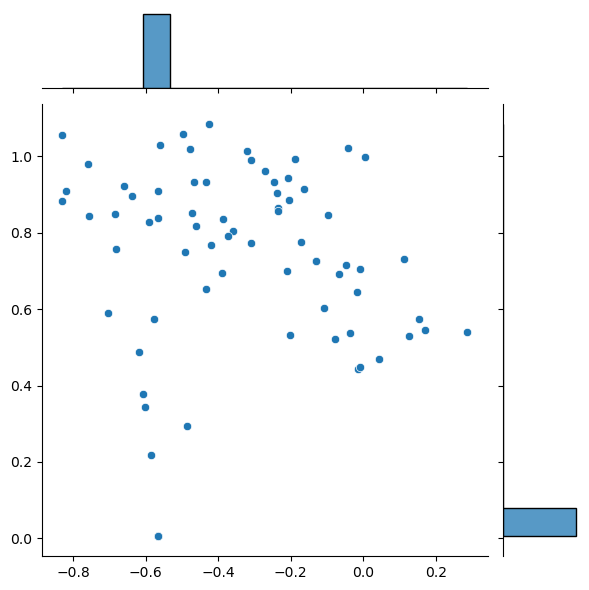

In [9]:
batch_percentage = 0.4
T = 10000

test_csMALA = csMALA(dataset = x, batch_percentage=batch_percentage)

start_time = time.time()
test_csMALA_run = test_csMALA.run(T, MAP)
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.6f} seconds")
plt_samples(test_csMALA_run)